In [2]:
%matplotlib inline

## preprocessing data from pre test DCM

In [3]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt
import sys
import glob
import os

# load the DICOM files
files = []
# assign directory
directory = "./Pre Test CT Scan/Series-431_11226 Core 1/"
 
# iterate over files in
# that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
#     if os.path.isfile(f):
#         print("loading: {}".format(f))
    files.append(pydicom.dcmread(f))

print("file count: {}".format(len(files)))

# skip files with no SliceLocation (eg scout views)
slices = []
skipcount = 0
for f in files:
    if hasattr(f, 'SliceLocation'):
        slices.append(f)
    else:
        skipcount = skipcount + 1

print("skipped, no SliceLocation: {}".format(skipcount))

# ensure they are in the correct order
slices = sorted(slices, key=lambda s: s.SliceLocation)

file count: 401
skipped, no SliceLocation: 0


## DCM file attributes description

In [4]:
def myprint(dataset, indent=0):
    """Go through all items in the dataset and print them with custom format

    Modelled after Dataset._pretty_str()
    """
    dont_print = ['Pixel Data', 'File Meta Information Version']

    indent_string = "   " * indent
    next_indent_string = "   " * (indent + 1)

    for data_element in dataset:
        if data_element.VR == "SQ":   # a sequence
            print(indent_string, data_element.name)
            for sequence_item in data_element.value:
                myprint(sequence_item, indent + 1)
                print(next_indent_string + "---------")
        else:
            if data_element.name in dont_print:
                print("""<item not printed -- in the "don't print" list>""")
            else:
                repr_value = repr(data_element.value)
                if len(repr_value) > 50:
                    repr_value = repr_value[:50] + "..."
                print("{0:s} {1:s} = {2:s}".format(indent_string,
                                                   data_element.name,
                                                   repr_value))
ds = slices[0]
print(myprint(ds))

 Group Length = 462
 Specific Character Set = 'ISO_IR 100'
 Image Type = ['ORIGINAL', 'PRIMARY', 'AXIAL']
 SOP Class UID = '1.2.840.10008.5.1.4.1.1.2'
 SOP Instance UID = '1.2.392.200036.9116.2.5.1.48.1214856213.163064026...
 Study Date = '20210903'
 Series Date = '20210903'
 Acquisition Date = '20210903'
 Content Date = '20210903'
 Study Time = '115635.000'
 Series Time = '115700.266'
 Acquisition Time = '115659.600'
 Content Time = '115710.478'
 Accession Number = '5025'
 Modality = 'CT'
 Manufacturer = 'TOSHIBA'
 Institution Name = 'ALS PETROPHYSICS'
 Referring Physician's Name = ''
 Station Name = 'ALSCTSCAN'
 Series Description = ' 0.5 Core Scanning Routine Wholecore FC30'
 Institutional Department Name = 'CORE ANALYSIS'
 Manufacturer's Model Name = 'Aquilion'
 Group Length = 62
 Patient's Name = 'Core_1'
 Patient ID = 'Series-431_21-J20_11226'
 Patient's Birth Date = ''
 Patient's Sex = ''
 Group Length = 310
 Scan Options = 'HELICAL_CT'
 Slice Thickness = '0.5'
 KVP = '120.0'
 D

Study Date.......: 20210903
Image size.......: 512 x 512
Pixel Spacing....: [0.292, 0.292]
Slice location...: -200.00
Slice Thickness....: 0.5


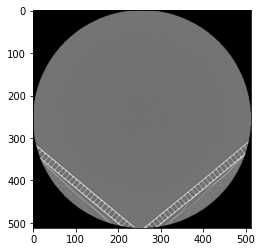

In [5]:
print(f"Study Date.......: {ds.StudyDate}")
print(f"Image size.......: {ds.Rows} x {ds.Columns}")
print(f"Pixel Spacing....: {ds.PixelSpacing}")
print(f"Slice location...: {ds.get('SliceLocation', '(missing)')}")
print(f"Slice Thickness....: {ds.SliceThickness}")
# plot the image using matplotlib
plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
plt.show()

In [6]:
# pixel aspects, assuming all slices are the same
ps = slices[0].PixelSpacing
ss = slices[0].SliceThickness
ax_aspect = ps[1]/ps[0]
sag_aspect = ps[1]/ss
cor_aspect = ss/ps[0]

## vision from diffrent aspects

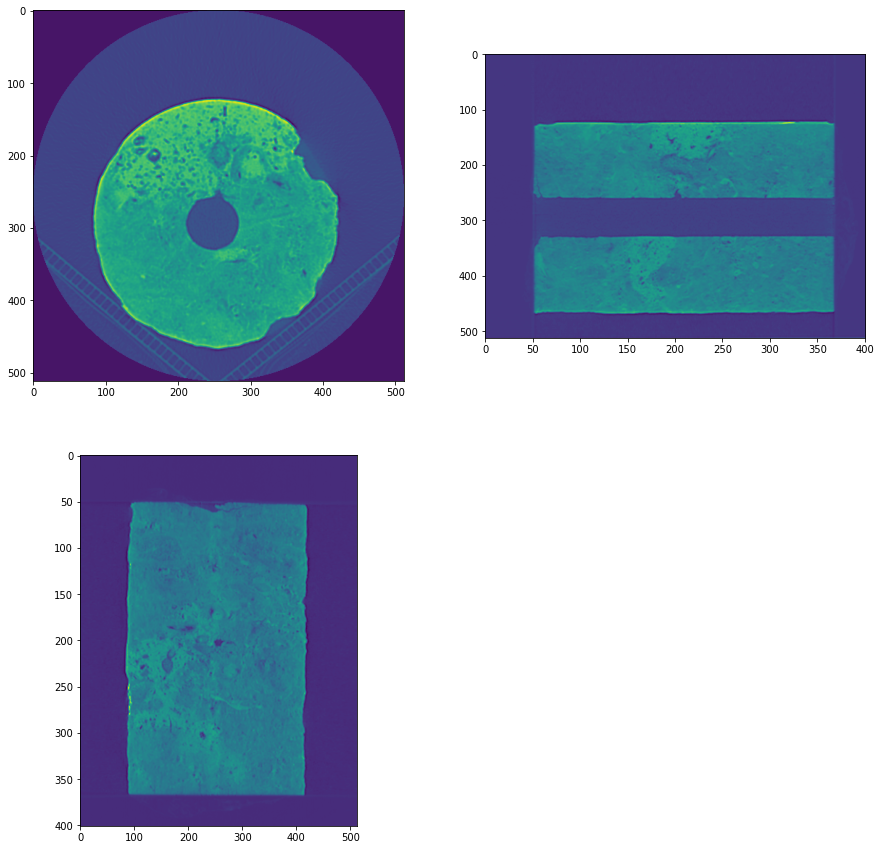

In [7]:
# create 3D array
img_shape = list(slices[0].pixel_array.shape)
img_shape.append(len(slices))
img3d = np.zeros(img_shape)

# fill 3D array with the images from the files
for i, s in enumerate(slices):
    img2d = s.pixel_array
    img3d[:, :, i] = img2d

# plot 3 orthogonal slices
fig = plt.figure(figsize=(15,15))
a1 = plt.subplot(2, 2, 1)
plt.imshow(img3d[:, :, img_shape[2]//2])
a1.set_aspect(ax_aspect)

a2 = plt.subplot(2, 2, 2)
plt.imshow(img3d[:, img_shape[1]//2, :])
a2.set_aspect(sag_aspect)

a3 = plt.subplot(2, 2, 3)
plt.imshow(img3d[img_shape[0]//2, :, :].T)
a3.set_aspect(cor_aspect)

plt.show()

## process data of the post test file

file count: 401
skipped, no SliceLocation: 0
 Group Length = 462
 Specific Character Set = 'ISO_IR 100'
 Image Type = ['ORIGINAL', 'PRIMARY', 'AXIAL']
 SOP Class UID = '1.2.840.10008.5.1.4.1.1.2'
 SOP Instance UID = '1.2.392.200036.9116.2.5.1.48.1214856213.164601412...
 Study Date = '20220228'
 Series Date = '20220228'
 Acquisition Date = '20220228'
 Content Date = '20220228'
 Study Time = '110536.000'
 Series Time = '110559.116'
 Acquisition Time = '110558.350'
 Content Time = '110609.228'
 Accession Number = '5187'
 Modality = 'CT'
 Manufacturer = 'TOSHIBA'
 Institution Name = 'ALS PETROPHYSICS'
 Referring Physician's Name = ''
 Station Name = 'ALSCTSCAN'
 Series Description = ' 0.5 Core Scanning Routine Wholecore FC30'
 Institutional Department Name = 'CORE ANALYSIS'
 Manufacturer's Model Name = 'Aquilion'
 Group Length = 60
 Patient's Name = 'ATWC 2'
 Patient ID = 'Series-470_22-J2_11226'
 Patient's Birth Date = ''
 Patient's Sex = ''
 Group Length = 310
 Scan Options = 'HELICAL_CT

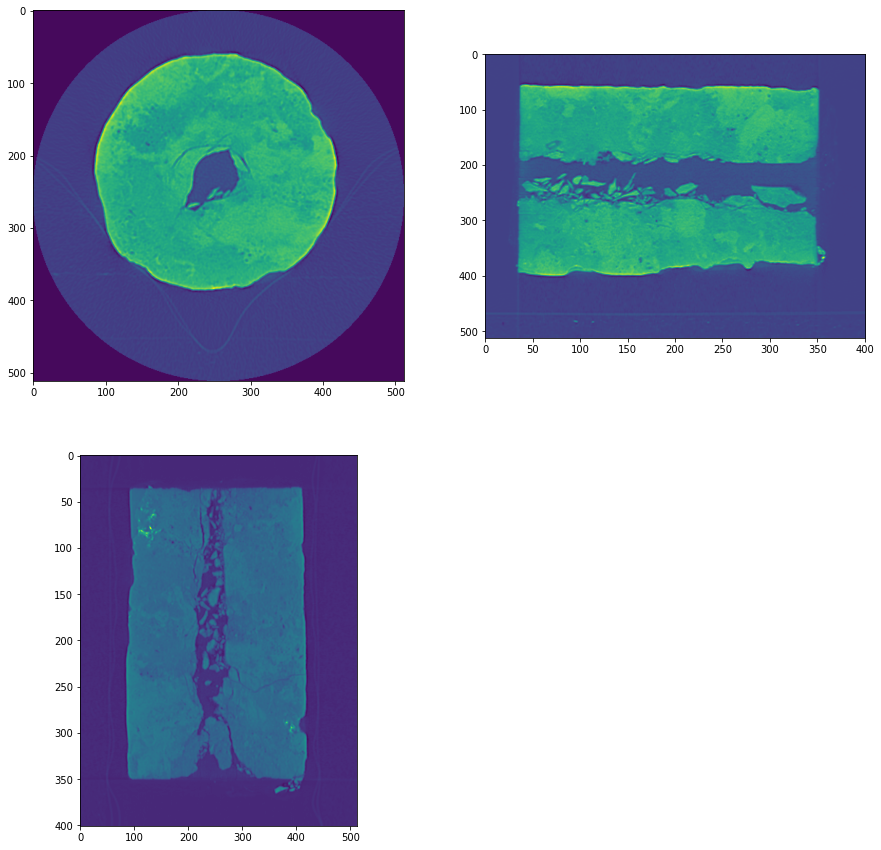

In [9]:
# load the DICOM files
files2 = []
# assign directory
directory2 = "./Post Test CT Scans/Series-470_22-J2_11226_ATWC 2"
 
# iterate over files in
# that directory
for filename in os.listdir(directory2):
    f = os.path.join(directory2, filename)
    files2.append(pydicom.dcmread(f))

print("file count: {}".format(len(files2)))

slices2 = []
skipcount = 0
for f in files2:
    if hasattr(f, 'SliceLocation'):
        slices2.append(f)
    else:
        skipcount = skipcount + 1

print("skipped, no SliceLocation: {}".format(skipcount))

# ensure they are in the correct order
slices2 = sorted(slices2, key=lambda s: s.SliceLocation)

ds2 = slices2[0]
print(myprint(ds2))

# pixel aspects, assuming all slices are the same
ps = slices2[0].PixelSpacing
ss = slices2[0].SliceThickness
ax_aspect = ps[1]/ps[0]
sag_aspect = ps[1]/ss
cor_aspect = ss/ps[0]
# create 3D array
img_shape = list(slices2[0].pixel_array.shape)
img_shape.append(len(slices2))
img3d_2 = np.zeros(img_shape)

# fill 3D array with the images from the files
for i, s in enumerate(slices2):
    img2d = s.pixel_array
    img3d_2[:, :, i] = img2d

# plot 3 orthogonal slices
fig = plt.figure(figsize=(15,15))
a1 = plt.subplot(2, 2, 1)
plt.imshow(img3d_2[:, :, img_shape[2]//2])
a1.set_aspect(ax_aspect)

a2 = plt.subplot(2, 2, 2)
plt.imshow(img3d_2[:, img_shape[1]//2, :])
a2.set_aspect(sag_aspect)

a3 = plt.subplot(2, 2, 3)
plt.imshow(img3d_2[img_shape[0]//2, :, :].T)
a3.set_aspect(cor_aspect)

plt.show()

## demonstrate the same slice of pre test and post test

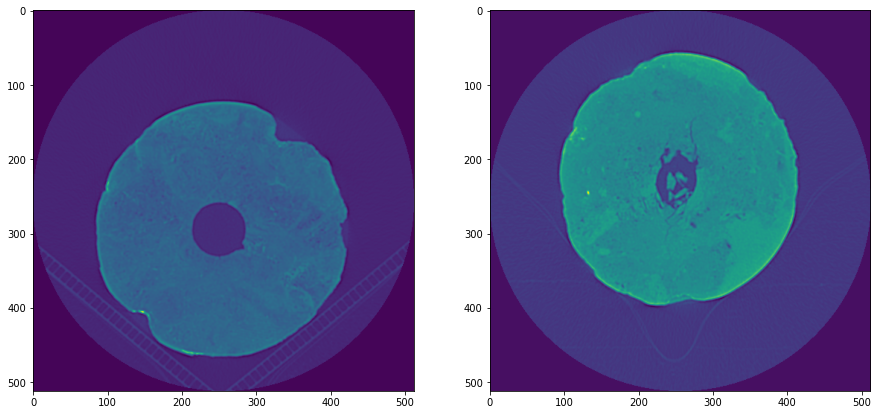

In [11]:
fig = plt.figure(figsize=(15,15))
ax1 = plt.subplot(1,2,1)
plt.imshow(img3d[:, :, img_shape[2]//4])
ax1.set_aspect(ax_aspect)
ax2 = plt.subplot(1,2,2)
plt.imshow(img3d_2[:, :, img_shape[2]//4])
ax2.set_aspect(ax_aspect)

# calculate the volume

## contour detection

In [15]:
import pydicom
import numpy
import numpy as np
import cv2
import os
import math
import pylab
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from scipy import ndimage
from skimage import morphology

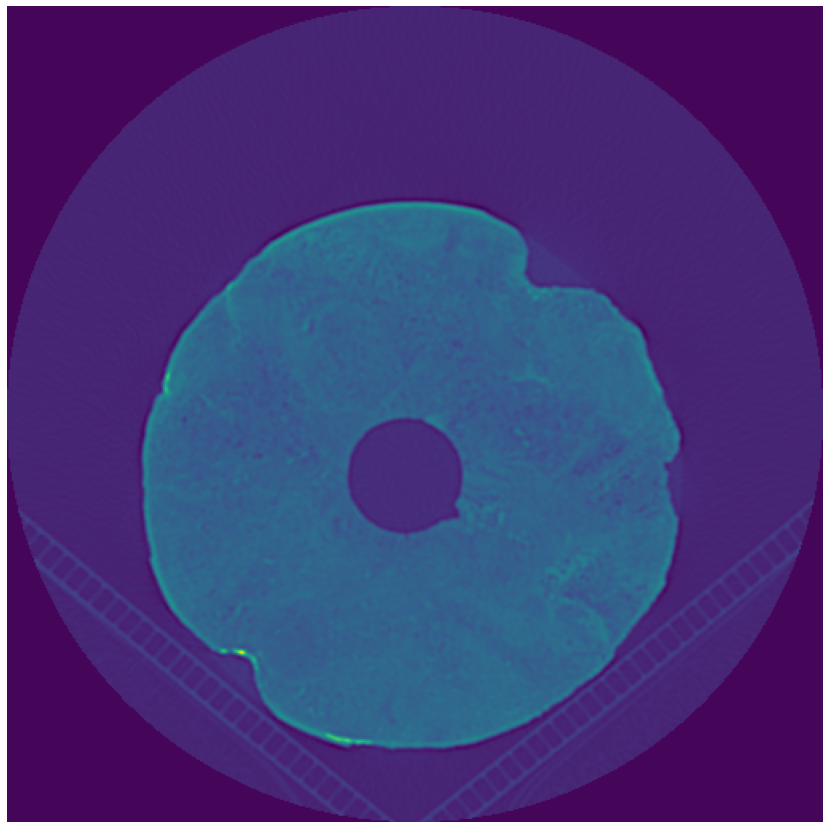

In [16]:
fig = plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(img3d[:, :, img_shape[2]//4])
plt.savefig('ImageDiff/1.png')

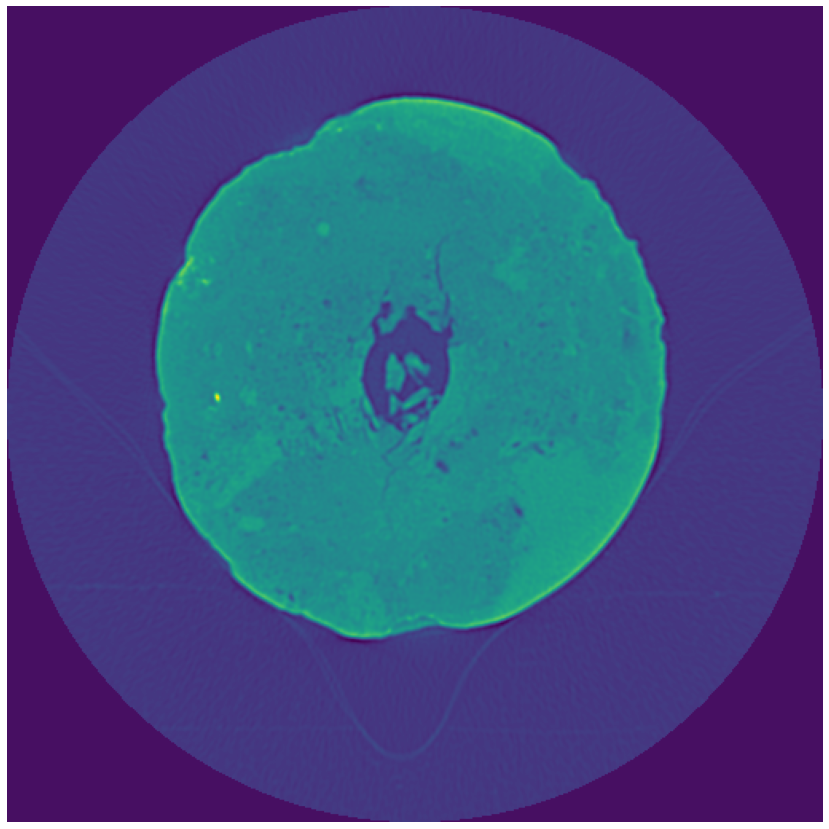

In [17]:
fig = plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(img3d_2[:, :, img_shape[2]//4])
plt.savefig('ImageDiff/2.png')

In [18]:
slice1 = img3d[:, :, img_shape[2]//4]
slice2 = img3d_2[:, :, img_shape[2]//4]
slice1_norm = np.zeros(slice1.shape, dtype=np.float32)
slice2_norm = np.zeros(slice1.shape, dtype=np.float32)
cv2.normalize(slice1, slice1_norm, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
cv2.normalize(slice2, slice2_norm, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

array([[0.04149328, 0.04149328, 0.04149328, ..., 0.04149328, 0.04149328,
        0.04149328],
       [0.04149328, 0.04149328, 0.04149328, ..., 0.04149328, 0.04149328,
        0.04149328],
       [0.04149328, 0.04149328, 0.04149328, ..., 0.04149328, 0.04149328,
        0.04149328],
       ...,
       [0.04149328, 0.04149328, 0.04149328, ..., 0.04149328, 0.04149328,
        0.04149328],
       [0.04149328, 0.04149328, 0.04149328, ..., 0.04149328, 0.04149328,
        0.04149328],
       [0.04149328, 0.04149328, 0.04149328, ..., 0.04149328, 0.04149328,
        0.04149328]], dtype=float32)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

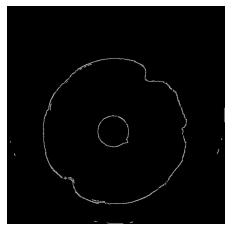

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1.
 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

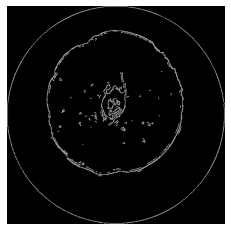

In [19]:
import math
import numpy as np
import matplotlib.pyplot as plt


# 生成高斯核
def gaussian_create():
    sigma1 = sigma2 = 1
    gaussian_sum = 0
    g = np.zeros([3, 3])
    for i in range(3):
        for j in range(3):
            g[i, j] = math.exp(-1 / 2 * (np.square(i - 1) / np.square(sigma1)
                                         + (np.square(j - 1) / np.square(sigma2)))) / (
                              2 * math.pi * sigma1 * sigma2)
            gaussian_sum = gaussian_sum + g[i, j]
    g = g / gaussian_sum  # 归一化
    return g


# 产生灰度图
def gray_fuc(rgb):
    return np.dot(rgb[..., :3], [0.299, 0.587, 0.114])


# 高斯卷积
def gaussian_blur(gray_img, g):
    gray_img = np.pad(gray_img, ((1, 1), (1, 1)), constant_values=0)  # 填充
    h, w = gray_img.shape
    new_gray_img = np.zeros([h - 2, w - 2])
    for i in range(h - 2):
        for j in range(w - 2):
            new_gray_img[i, j] = np.sum(gray_img[i:i + 3, j:j + 3] * g)
    return new_gray_img


# 求高斯偏导
def partial_derivative(new_gray_img):
    new_gray_img = np.pad(new_gray_img, ((0, 1), (0, 1)), constant_values=0)  # 填充
    h, w = new_gray_img.shape
    dx_gray = np.zeros([h - 1, w - 1])  # 用来存储x方向偏导
    dy_gray = np.zeros([h - 1, w - 1])  # 用来存储y方向偏导
    df_gray = np.zeros([h - 1, w - 1])  # 用来存储梯度强度
    for i in range(h - 1):
        for j in range(w - 1):
            dx_gray[i, j] = new_gray_img[i, j + 1] - new_gray_img[i, j]
            dy_gray[i, j] = new_gray_img[i + 1, j] - new_gray_img[i, j]
            df_gray[i, j] = np.sqrt(np.square(dx_gray[i, j]) + np.square(dy_gray[i, j]))
    return dx_gray, dy_gray, df_gray


# 非极大值抑制
def non_maximum_suppression(dx_gray, dy_gray, df_gray):
    df_gray = np.pad(df_gray, ((1, 1), (1, 1)), constant_values=0)  # 填充
    h, w = df_gray.shape
    for i in range(1, h - 1):
        for j in range(1, w - 1):
            if df_gray[i, j] != 0:
                gx = math.fabs(dx_gray[i - 1, j - 1])
                gy = math.fabs(dy_gray[i - 1, j - 1])
                if gx > gy:
                    weight = gy / gx
                    grad1 = df_gray[i + 1, j]
                    grad2 = df_gray[i - 1, j]
                    if gx * gy > 0:
                        grad3 = df_gray[i + 1, j + 1]
                        grad4 = df_gray[i - 1, j - 1]
                    else:
                        grad3 = df_gray[i + 1, j - 1]
                        grad4 = df_gray[i - 1, j + 1]
                else:
                    weight = gx / gy
                    grad1 = df_gray[i, j + 1]
                    grad2 = df_gray[i, j - 1]
                    if gx * gy > 0:
                        grad3 = df_gray[i + 1, j + 1]
                        grad4 = df_gray[i - 1, j - 1]
                    else:
                        grad3 = df_gray[i + 1, j - 1]
                        grad4 = df_gray[i - 1, j + 1]
                t1 = weight * grad1 + (1 - weight) * grad3
                t2 = weight * grad2 + (1 - weight) * grad4
                if df_gray[i, j] > t1 and df_gray[i, j] > t2:
                    df_gray[i, j] = df_gray[i, j]
                else:
                    df_gray[i, j] = 0
    return df_gray


# 双阈值过滤
def double_threshold(df_gray, low, high):
    h, w = df_gray.shape
    for i in range(1, h - 1):
        for j in range(1, w - 1):
            if df_gray[i, j] < low:
                df_gray[i, j] = 0
            elif df_gray[i, j] > high:
                df_gray[i, j] = 1
            elif (df_gray[i, j - 1] > high) or (df_gray[i - 1, j - 1] > high) or (
                    df_gray[i + 1, j - 1] > high) or (df_gray[i - 1, j] > high) or (df_gray[i + 1, j] > high) or (
                    df_gray[i - 1, j + 1] > high) or (df_gray[i, j + 1] > high) or (df_gray[i + 1, j + 1] > high):
                df_gray[i, j] = 1
            else:
                df_gray[i, j] = 0
    return df_gray


if __name__ == '__main__':
    # 读取图像
    gaussian = gaussian_create()
    # 生成灰度图
    gray = slice1_norm
    # 高斯卷积
    new_gray = gaussian_blur(gray, gaussian)
    # 求偏导
    d = partial_derivative(new_gray)
    dx = d[0]
    dy = d[1]
    df = d[2]
    # 非极大值抑制
    new_df = non_maximum_suppression(dx, dy, df)
    # 双阈值过滤,并将图像转换成转化二值图
    low_threshold = 0.15 * np.max(new_df)
    high_threshold = 0.2 * np.max(new_df)
    result = double_threshold(new_df, low_threshold, high_threshold)
    print(result[250])
    # 输出图像
    plt.imshow(result, cmap="gray")
    plt.axis("off")
    plt.show()
    gray = slice2_norm
    # 高斯卷积
    new_gray = gaussian_blur(gray, gaussian)
    # 求偏导
    d = partial_derivative(new_gray)
    dx = d[0]
    dy = d[1]
    df = d[2]
    # 非极大值抑制
    new_df = non_maximum_suppression(dx, dy, df)
    # 双阈值过滤,并将图像转换成转化二值图
    low_threshold = 0.15 * np.max(new_df)
    high_threshold = 0.2 * np.max(new_df)
    result = double_threshold(new_df, low_threshold, high_threshold)
    print(result[250])
    # 输出图像
    plt.imshow(result, cmap="gray")
    plt.axis("off")
    plt.show()

## remove noise

<ipython-input-22-216f007a2ab2>:17: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  label_count = np.bincount(labels.ravel().astype(np.int))


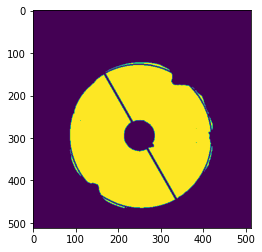

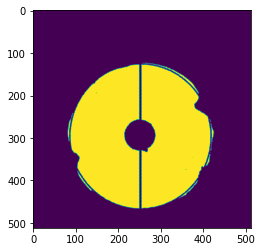

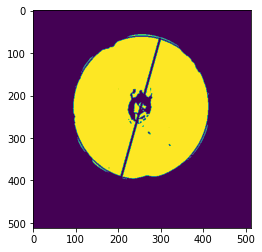

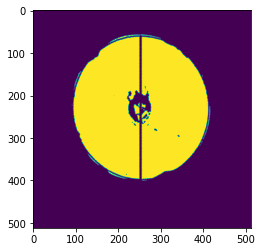

In [22]:
def window_image(image, window_center, window_width):
    img_min = window_center - window_width // 2
    img_max = window_center + window_width // 2
    window_image = image.copy()
    window_image[window_image < img_min] = img_min
    window_image[window_image > img_max] = img_max
    
    return window_image

def remove_noise(img_arr, display=False):
    hu_image = img_arr
    brain_image = window_image(hu_image, 40, 80) #bone windowing
    
    segmentation = morphology.dilation(brain_image, np.ones((1, 1)))
    labels, label_nb = ndimage.label(segmentation)
    
    label_count = np.bincount(labels.ravel().astype(np.int))
    label_count[0] = 0

    mask = labels == label_count.argmax()
 
    mask = morphology.dilation(mask, np.ones((1, 1)))
    mask = ndimage.morphology.binary_fill_holes(mask)
    mask = morphology.dilation(mask, np.ones((3, 3)))
    masked_image = mask * brain_image
    return masked_image

if __name__ == '__main__':
    iskemiMaskedImg = remove_noise(img3d[:, :, img_shape[2]//4])
    img=numpy.uint8 (iskemiMaskedImg)
    contours, hier =cv2.findContours (img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    mask=numpy.zeros (img.shape, numpy.uint8)

    # find the biggest contour (c) by the area
    c = max(contours, key = cv2.contourArea)

    (x,y),(MA,ma),angle = cv2.fitEllipse(c)

    cv2.ellipse(img, ((x,y), (MA,ma), angle), color=(0, 255, 0), thickness=2)

    rmajor = max(MA,ma)/2
    if angle > 90:
        angle -= 90
    else:
        angle += 96
    xtop = x + math.cos(math.radians(angle))*rmajor
    ytop = y + math.sin(math.radians(angle))*rmajor
    xbot = x + math.cos(math.radians(angle+180))*rmajor
    ybot = y + math.sin(math.radians(angle+180))*rmajor
    cv2.line(img, (int(xtop),int(ytop)), (int(xbot),int(ybot)), (0, 255, 0), 3)

    pylab.imshow(img)
    pylab.show()

    M = cv2.getRotationMatrix2D((x, y), angle-90, 1)  #transformation matrix

    img = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]), cv2.INTER_CUBIC)
    cv2.imwrite("ImageDiff/clean1.png",img)
    pylab.imshow(img)
    pylab.show()
    
    #image2
    iskemiMaskedImg = remove_noise(img3d_2[:, :, img_shape[2]//4])
    img=numpy.uint8 (iskemiMaskedImg)
    contours, hier =cv2.findContours (img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    mask=numpy.zeros (img.shape, numpy.uint8)

    # find the biggest contour (c) by the area
    c = max(contours, key = cv2.contourArea)

    (x,y),(MA,ma),angle = cv2.fitEllipse(c)

    cv2.ellipse(img, ((x,y), (MA,ma), angle), color=(0, 255, 0), thickness=2)

    rmajor = max(MA,ma)/2
    if angle > 90:
        angle -= 90
    else:
        angle += 96
    xtop = x + math.cos(math.radians(angle))*rmajor
    ytop = y + math.sin(math.radians(angle))*rmajor
    xbot = x + math.cos(math.radians(angle+180))*rmajor
    ybot = y + math.sin(math.radians(angle+180))*rmajor
    cv2.line(img, (int(xtop),int(ytop)), (int(xbot),int(ybot)), (0, 255, 0), 3)

    pylab.imshow(img)
    pylab.show()

    M = cv2.getRotationMatrix2D((x, y), angle-90, 1)  #transformation matrix

    img = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]), cv2.INTER_CUBIC)
    pylab.imshow(img)
    pylab.show()
    cv2.imwrite("ImageDiff/clean2.png",img)

## align two images

In [28]:
from __future__ import print_function
import cv2
import numpy as np

MAX_FEATURES = 500
GOOD_MATCH_PERCENT = 0.15

def alignImages(im1, im2, cnt):

    # Convert images to grayscale
    im1Gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
    im2Gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

    # Detect ORB features and compute descriptors.
    orb = cv2.ORB_create(MAX_FEATURES)
    keypoints1, descriptors1 = orb.detectAndCompute(im1Gray, None)
    keypoints2, descriptors2 = orb.detectAndCompute(im2Gray, None)

    # Match features.
    matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
    matches = matcher.match(descriptors1, descriptors2, None)

    # Sort matches by score
    matches = list(matches)
    matches.sort(key=lambda x: x.distance, reverse=False)

    # Remove not so good matches
    numGoodMatches = int(len(matches) * GOOD_MATCH_PERCENT)
    matches = matches[:numGoodMatches]

    # Draw top matches
    imMatches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, matches, None)
    cv2.imwrite("matches"+str(cnt)+".jpg", imMatches)

    # Extract location of good matches
    points1 = np.zeros((len(matches), 2), dtype=np.float32)
    points2 = np.zeros((len(matches), 2), dtype=np.float32)

    for i, match in enumerate(matches):
        points1[i, :] = keypoints1[match.queryIdx].pt
        points2[i, :] = keypoints2[match.trainIdx].pt

    # Find homography
    h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)

    # Use homography
    height, width, channels = im2.shape
    im1Reg = cv2.warpPerspective(im1, h, (width, height))

    return im1Reg, h
 

if __name__ == '__main__':
 
    cnt = 0
    # Read reference image
    refFilename = "ImageDiff/clean2.png"
    print("Reading reference image : ", refFilename)
    imReference = cv2.imread(refFilename, cv2.IMREAD_COLOR)

    # Read image to be aligned
    imFilename = "ImageDiff/clean1.png"
    print("Reading image to align : ", imFilename);
    im = cv2.imread(imFilename, cv2.IMREAD_COLOR)

    print("Aligning images ...")
    # Registered image will be resotred in imReg.
    # The estimated homography will be stored in h.
    imReg, h = alignImages(im, imReference, cnt)

    # Write aligned image to disk.
    outFilename = "ImageDiff/eg_aligned.jpg"
    print("Saving aligned image : ", outFilename);
    cv2.imwrite(outFilename, imReg)

    # Print estimated homography
    print("Estimated homography : \n",  h)

Reading reference image :  ImageDiff/clean2.png
Reading image to align :  ImageDiff/clean1.png
Aligning images ...
Saving aligned image :  ImageDiff/eg_aligned.jpg
Estimated homography : 
 [[-1.30437222e+00  2.43550540e+00 -1.04320213e+02]
 [-3.76580160e+00  3.75657192e+00  2.37043219e+02]
 [-8.22718976e-03  7.87108848e-03  1.00000000e+00]]


In [29]:
from skimage.metrics import structural_similarity
import cv2
import numpy as np
from PIL import Image

# Load images
# before = cv2.imread('ImageDiff/diff1.jpg')
# after = cv2.imread('ImageDiff/diff2.jpg')

before = cv2.imread('ImageDiff/clean1.png')
after = cv2.imread('ImageDiff/clean2.png')

# Convert images to grayscale
before_gray = cv2.cvtColor(before, cv2.COLOR_BGR2GRAY)
after_gray = cv2.cvtColor(after, cv2.COLOR_BGR2GRAY)

before_gray = cv2.resize(before_gray, dsize=(480,480), interpolation=cv2.INTER_CUBIC)
after_gray = cv2.resize(after_gray, dsize=(480,480), interpolation=cv2.INTER_CUBIC)
# cv2.imshow('before', before_gray)
# cv2.imwrite("before.png",before_gray)
# cv2.imshow('after', after_gray)
# cv2.imwrite('after.png', after_gray)
# Compute SSIM between the two images
(score, diff) = structural_similarity(before_gray, after_gray, full=True)
print("Image Similarity: {:.4f}%".format(score * 100))

diff = (diff * 255).astype("uint8")
diff_box = cv2.merge([diff, diff, diff])

# Threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]

mask = np.zeros(before.shape, dtype='uint8')
filled_after = after.copy()

for c in contours:
    area = cv2.contourArea(c)
    if area > 40:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(before, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.rectangle(after, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.rectangle(diff_box, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.drawContours(mask, [c], 0, (255,255,255), -1)
        cv2.drawContours(filled_after, [c], 0, (0,255,0), -1)

cv2.imwrite("ImageDiff/diff.png",diff)
cv2.imwrite("ImageDiff/diff_box.png", diff_box)

Image Similarity: 75.3561%


True

## contour recogonition

In [30]:
import cv2
import numpy as np
# from imageio import imread, imresize, imsave
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from collections import Counter


def find_vector_set(diff_image, new_size):
   
    i = 0
    j = 0
    vector_set = np.zeros((int(new_size[0] * new_size[1] / 25), 25))

    print('\nvector_set shape',vector_set.shape)
    
    while i < vector_set.shape[0]:
        while j < new_size[0]:
            k = 0
            while k < new_size[1]:
                block   = diff_image[j:j+5, k:k+5]
                #print(i,j,k,block.shape)
                feature = block.ravel()
                vector_set[i, :] = feature
                k = k + 5
            j = j + 5
        i = i + 1
        
            
    mean_vec   = np.mean(vector_set, axis = 0)    
    vector_set = vector_set - mean_vec
    
    return vector_set, mean_vec

  
def find_FVS(EVS, diff_image, mean_vec, new):
    
    i = 2 
    feature_vector_set = []
    
    while i < new[0] - 2:
        j = 2
        while j < new[1] - 2:
            block = diff_image[i-2:i+3, j-2:j+3]
            feature = block.flatten()
            feature_vector_set.append(feature)
            j = j+1
        i = i+1
        
    FVS = np.dot(feature_vector_set, EVS)
    FVS = FVS - mean_vec
    print("\nfeature vector space size",FVS.shape)
    return FVS

def clustering(FVS, components, new):
    
    kmeans = KMeans(components, verbose = 0)
    kmeans.fit(FVS)
    output = kmeans.predict(FVS)
    count  = Counter(output)

    least_index = min(count, key = count.get)            
    print(new[0],new[1])
    change_map  = np.reshape(output,(new[0] - 4, new[1] - 4))
    
    return least_index, change_map

   
def find_PCAKmeans(imagepath1, imagepath2):
    
    print('Operating')
    
    image1 = cv2.imread(imagepath1)
    image2 = cv2.imread(imagepath2)
    
    image1= cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    print(image1.shape,image2.shape) 
    new_size = np.asarray(image1.shape) / 5
    new_size = new_size.astype(int) * 5
    image1 = cv2.resize(image1, (new_size)).astype(np.int16)
    image2 = cv2.resize(image2, (new_size)).astype(np.int16)
    
    diff_image = abs(image1 - image2)   
    cv2.imwrite('diff.jpg', diff_image)
    print('\nBoth images resized to ',new_size)
        
    vector_set, mean_vec = find_vector_set(diff_image, new_size)
    
    pca     = PCA()
    pca.fit(vector_set)
    EVS = pca.components_
        
    FVS     = find_FVS(EVS, diff_image, mean_vec, new_size)
    
    print('\ncomputing k means')
    
    components = 3
    least_index, change_map = clustering(FVS, components, new_size)
    
    change_map[change_map == least_index] = 255
    change_map[change_map != 255] = 0
    
    change_map = change_map.astype(np.uint8)
    kernel     = np.asarray(((0,0,1,0,0),
                             (0,1,1,1,0),
                             (1,1,1,1,1),
                             (0,1,1,1,0),
                             (0,0,1,0,0)), dtype=np.uint8)
    cleanChangeMap = cv2.erode(change_map,kernel)
    cv2.imwrite("changemap.jpg", change_map)
    cv2.imwrite("cleanchangemap.jpg", cleanChangeMap)

    
if __name__ == "__main__":
    a = 'ImageDiff/clean1.png'
    b = 'ImageDiff/clean2.png'
    find_PCAKmeans(a,b)    

Operating
(512, 512) (512, 512)

Both images resized to  [510 510]

vector_set shape (10404, 25)


/Users/jieyu/opt/anaconda3/envs/ese-msc/lib/python3.9/site-packages/sklearn/decomposition/_pca.py:527: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var



feature vector space size (256036, 25)

computing k means
510 510


### to be implemented, calculate the loss area

In [31]:
def compare_images(img1, img2):
    # need to be implemented: the algorithm to recoginize the loss area
    return 0.1 * 512 * 512

In [32]:
def cal_volume_loss(pre_test, post_test):
    ps = pre_test[0].PixelSpacing
    thick = pre_test[0].SliceThickness
    vol_loss = 0
    for i in range(len(pre_test)):
        img1 = pre_test[i].pixel_array
        img2 = post_test[i].pixel_array
        loss_size = compare_images(img1, img2)
        loss_actual_size = loss_size * ps[0] * ps[1] * 0.001 * 0.001
        vol_loss += loss_actual_size * thick * 0.001
    return vol_loss

![title](img/pixel_spacing.svg)

In [33]:
print("the volume loss is\n")
cal_volume_loss(slices, slices2)

the volume loss is



0.0004481464926207972